# Table of Content
1. [Load Data](#first-bullet)
2. [Define Net](#second-bullet)
3. [Getting Noise as Input](#third-bullet)
4. [trial 3](#fourth-bullet)
5. [trial 4](#fifth-bullet)
6. [trial 5](#sixth-bullet)

--------------
# Load Data <a class="anchor" id="first-bullet"></a>


In [1]:
import torchvision
from matplotlib.pyplot import imshow, pause

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Functions import *

sigma = 0.1

images = getData('MNIST')
noisy_images = get_noisy_image(images.numpy(),sigma)
noisy_images = np.squeeze(torch.tensor(noisy_images),1)
images = np.squeeze(images,1)

torch.Size([1, 28, 28])

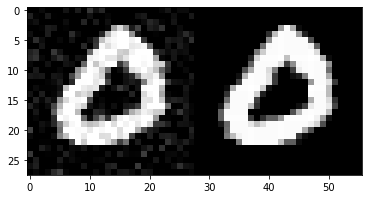

In [3]:
getPlot([noisy_images,images])
noisy_images.shape

# Trial <a class='anchor' id="second-bullet"></a>

In [4]:
import torch.nn as nn

class RNN(nn.Module):
    #docstring for RNN.

    def __init__(self, n_steps,n_neurons, gamma=0.001, epsilon=0.01):
        super(RNN, self).__init__()
        self.W = nn.Parameter(torch.randn(n_neurons, n_neurons))
        self.b = nn.Parameter(torch.randn(1,n_neurons))
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_neurons = n_neurons

    def forward(self, X):
        output = []
        self.ht = torch.zeros(X.shape[0], self.n_neurons)
        states = []
        states.append(self.ht)

        for i in range(n_steps):
            alpha = torch.mm(states[i],self.W)+self.b
            self.ht = states[i] + self.epsilon*torch.tanh(alpha)
            states.append(self.ht)
        return states


'\n\n    def __init__(self, n_steps,n_neurons, gamma=0.001, epsilon=0.01):\n        super(RNN, self).__init__()\n        self.W = nn.Parameter(torch.randn(n_neurons, n_neurons))\n        self.b = nn.Parameter(torch.randn(1,n_neurons))\n        self.gamma = gamma\n        self.epsilon = epsilon\n        self.n_neurons = n_neurons\n\n    def forward(self, X):\n        output = []\n        self.ht = torch.zeros(X.shape[0], self.n_neurons)\n        states = []\n        states.append(self.ht)\n\n        for i in range(n_steps):\n            alpha = torch.mm(states[i],self.W)+self.b\n            self.ht = states[i] + self.epsilon*torch.tanh(alpha)\n            states.append(self.ht)\n        return states\n'

In [5]:
n_steps = 30
n_neurons = 28
model = RNN(n_neurons=n_neurons)
criterion = nn.MSELoss()
n_epochs = 5

## Getting noise as imput <a class='anchor' id="third-bullet"></a>

In [6]:
img_noise = np.random.normal(scale=sigma, size=images.shape)


/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


torch.Size([28, 28])

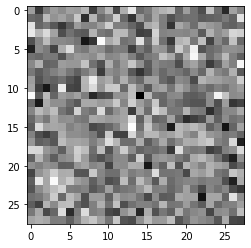

In [31]:
img_noise = np.squeeze(torch.tensor(img_noise))
getPlot([img_noise, img_noise])
img_noise.size()

In [43]:
def train(out,true,optimizer = 'mse'):
    """
    """
    if optimizer == 'mse':
        criterion = nn.MSELoss()

    elif optimizer == 'cse':
        criterion = nn.CrossEntropyLoss()
    
    #print(out.type())
    #print(torch.tensor(out).size())
    loss_val = criterion(torch.tensor(out),torch.tensor(true))

    return loss_val, out

In [50]:
def optim(num_epochs, inputs, true, net , train, n_steps, optimizer, total_step = 1):
    """Optimization of our funciton

    Args:
        num_epochs: number of epochs
        input: our input to our network
        true: true label that is expected
        net: our network
        train: training algorithm that spit out loss value and our output image
    """
    for epoch in range(num_epochs):

        sumloss = 0
        print(epoch)
        
        for i in range(total_step):
            print('inputs',inputs.size())
            out = net(inputs,n_steps)
            out = torch.reshape(out,[1,28,28])
            print('out',out.size())
            print('true',true.size())
            loss1, output = train(out,true)
            sumloss += loss1
            

        loss = sumloss/total_step

        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss))
        
        loss.requres_grad = True
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        getPlot(torch.tensor(out))

In [51]:
adam = torch.optim.Adam(model.parameters(),lr = 0.01)

In [52]:
optim(n_epochs,torch.tensor(img_noise),torch.tensor(noisy_images),model,train,n_steps,adam)

0
inputs torch.Size([28, 28])
out torch.Size([1, 28, 28])
true torch.Size([1, 28, 28])
Epoch [1/5], Loss: 0.2310


/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    y_pred, _ = net(torch.tensor())
    loss = criterion(y_pred, torch.tensor(y_batch, dtype=torch.float))
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordinglyoutput, hidden = model(input_seq)
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.8e}".format(loss.item()))